### **Problem Overview**

This notebook demonstrates a probabilistic model using coin flips to explore binary outcomes. We estimate probabilities and confidence intervals using both frequentist and Bayesian approaches, comparing the results.

The problem is divided into three parts:
1. **Probability Distribution**
2. **Simulation**: Observing the outcomes from multiple coin flips to analyze results using a biased coin.
3. **Estimation**: Estimating an unknown probability \( p_1 \) based on observed data and constructing a confidence interval.

Each coin has a probability \( p_1 \) of showing a `1` and \( p_0 = 1 - p_1 \) of showing a `0`.


#### **Question 1.1: Probability Distribution**

We model the probability of obtaining a given number of `1`s out of \( N \) coin flips using a **Binomial distribution**, which suits our scenario:
- Each coin flip is an independent trial with two outcomes.
- We seek the probability of obtaining exactly \( k \) successes (`1`s) in \( N \) trials.

#### **Question 1.2: Coin Flip Simulation**

This simulation explores the empirical distribution of average outcomes when flipping multiple coins, each with a 58% chance of showing a `1`.

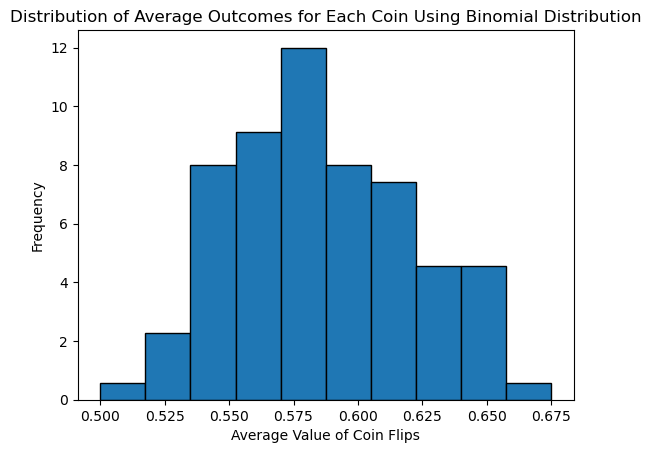

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_coins = 100         # Number of coins
flips_per_coin = 200  # Flips per coin
p_1 = 0.58            # Probability of flipping a 1

# Simulate the number of `1`s obtained for each coin over 200 flips
success_counts = np.random.binomial(flips_per_coin, p_1, size=n_coins)

# Calculate the average number of `1`s per flip for each coin
averages = success_counts / flips_per_coin

# Plot the histogram
plt.hist(averages, bins=10, edgecolor='black', density=True)
plt.xlabel('Average Value of Coin Flips')
plt.ylabel('Frequency')
plt.title('Distribution of Average Outcomes for Each Coin Using Binomial Distribution')
plt.show()


The histogram shows that most coins have an average outcome close to the expected probability of 0.58. Variations around this mean arise from random fluctuations in each coin’s flips.

#### **Question 1.3: Estimating an Unknown Probability \( p_1 \)**

Assuming an unknown \( p_1 \) for a single coin, we observed 998 `1`s out of 1000 flips. This section estimates \( p_1 \) and computes a confidence interval.

We'll compare two different methods for the estimation of p_1: *Frequentist* and *Bayesian*

In [18]:
# Frequentist Estimation

# Given data
successes = 998
trials = 1000

# Estimate of p1
p_hat = successes / trials

# Standard error calculation
standard_error = np.sqrt(p_hat * (1 - p_hat) / trials)

# Confidence level (95%)
z_score = 1.96

# Confidence interval
ci_lower = p_hat - z_score * standard_error
ci_upper = p_hat + z_score * standard_error

print(f"Estimated p_1: {p_hat:.4f}")
print(f"95% Confidence Interval for p_1: ({ci_lower:.4f}, {ci_upper:.4f})")

Estimated p_1: 0.9980
95% Confidence Interval for p_1: (0.9952, 1.0008)


The frequentist method estimates \( p_1 \) as 0.998 with a 95% confidence interval of (0.9952, 1.0008). Note that the upper bound exceeds 1, a limitation of the normal approximation for probabilities close to 1.

In [20]:
# Bayesian Estimation

from scipy.stats import beta

# Bayesian Estimation with a non-informative prior <==> Beta(1,1)

# Prior parameters
alpha_prior = 1
beta_prior = 1

# Posterior parameters after observing the data
alpha_post = alpha_prior + successes
beta_post = beta_prior + trials - successes

# Bayesian point estimate (posterior mean)
p1_bayes_estimate = alpha_post / (alpha_post + beta_post)

# 95% credible interval using the Beta distribution
ci_lower, ci_upper = beta.ppf([0.025, 0.975], alpha_post, beta_post)

print(f"Bayesian Estimate of p_1: {p1_bayes_estimate:.4f}")
print(f"95% Credible Interval for p_1: ({ci_lower:.4f}, {ci_upper:.4f})")


Bayesian Estimate of p_1: 0.9970
95% Credible Interval for p_1: (0.9928, 0.9994)


The Bayesian method, using a Beta distribution for the posterior, estimates \( p_1 \) as 0.9970 with a 95% credible interval of (0.9928, 0.9994). This interval respects the [0, 1] range, making it more reliable for probabilities near the extremes.

### Summary: Comparison of Frequentist and Bayesian Estimations for \( p_1 \)

#### Results

##### Frequentist Method
- **Estimated \( p_1 \)**: 0.998
- **95% Confidence Interval**: (0.9952, 1.0008)

##### Bayesian Method
- **Estimated \( p_1 \)**: 0.9970
- **95% Credible Interval**: (0.9928, 0.9994)

#### Key Observations

1. **Frequentist Limitation**: The frequentist confidence interval slightly exceeds 1, which is not valid for probabilities. This is due to the limitations of the normal approximation at values near 1.
   
2. **Bayesian Advantage**: The Bayesian approach provides an interval constrained to [0, 1], making it more appropriate when the estimated probability is close to an extreme (near 1 in this case).

#### Recommendation
The **Bayesian method** is preferred in this scenario for its realistic and bounded interval estimation of \( p_1 \).